<a href="https://colab.research.google.com/github/ftrnailahhh/Sains-Data-Terapan/blob/main/19_097_UAS_SDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [ ]:
#read data
data_sp= pd.read_excel("StudentsPerformance.xlsx")
data_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data_sp.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
#jumlah data (baris, kolom)
data_sp.shape

(1000, 8)

In [ ]:
#cek duplikasi
data_sp.duplicated().sum()

0

In [ ]:
#cek missing value 
data_sp.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Visualisasi Data

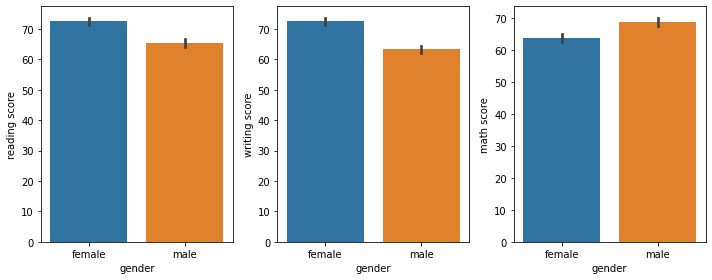

In [ ]:
# Bar Plot of Scores according to gender
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.barplot(x = 'gender', y = 'reading score', data = data_sp)

plt.subplot(1,3,2)
sns.barplot(x = 'gender', y = 'writing score', data = data_sp)

plt.subplot(1,3,3)
sns.barplot(x = 'gender', y = 'math score', data = data_sp)

plt.tight_layout()

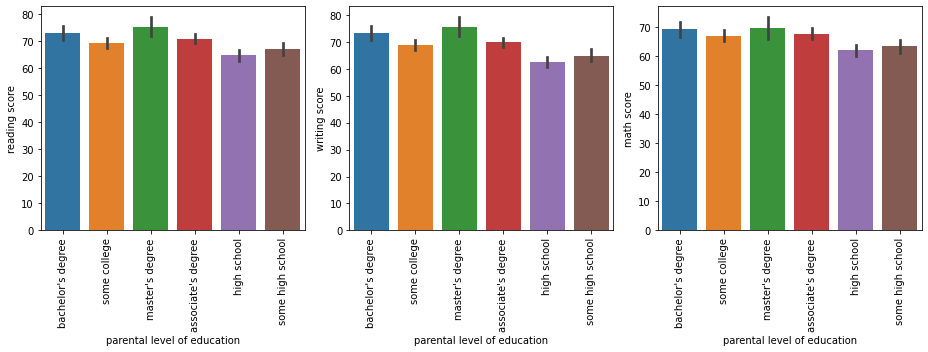

In [ ]:
#  Bar Plots of Scores on the basis of Parent's Education Level
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.barplot(x = 'parental level of education', y = 'reading score', data = data_sp)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x = 'parental level of education', y = 'writing score', data = data_sp)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x = 'parental level of education', y = 'math score', data = data_sp)
plt.xticks(rotation = 90)

plt.tight_layout()

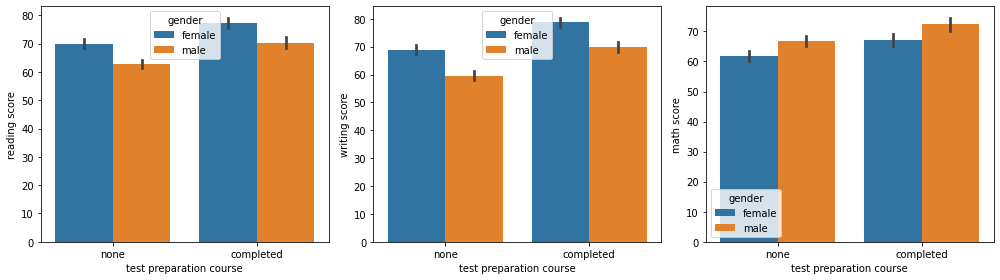

In [ ]:
#Bar plots of Scores on the basis of Test Prepration Course
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'test preparation course', y = 'reading score', hue = 'gender', data = data_sp)

plt.subplot(1,3,2)
sns.barplot(x = 'test preparation course', y = 'writing score',hue = 'gender', data = data_sp)

plt.subplot(1,3,3)
sns.barplot(x = 'test preparation course', y = 'math score',hue = 'gender', data = data_sp)

plt.tight_layout()

In [ ]:
# data_sp2 = data_sp.copy()
# data_sp2

In [ ]:
#drop data numerik
data_sp2 = data_sp.copy()
data_sp2 = data_sp2.drop(['gender'], axis=1)
data_sp2 = data_sp2.drop(['race/ethnicity'], axis=1)
data_sp2 = data_sp2.drop(['parental level of education'], axis=1)
data_sp2 = data_sp2.drop(['lunch'], axis=1)
data_sp2 = data_sp2.drop(['test preparation course'], axis=1)
data_sp2

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [ ]:
#normalisasi data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_sp2[["math score"]] = pd.DataFrame(scaler.fit_transform(data_sp2[["math score"]]), columns = data_sp2[["math score"]].columns)
data_sp2[["reading score"]] = pd.DataFrame(scaler.fit_transform(data_sp2[["reading score"]]), columns = data_sp2[["reading score"]].columns)
data_sp2[["writing score"]] = pd.DataFrame(scaler.fit_transform(data_sp2[["writing score"]]), columns = data_sp2[["writing score"]].columns)
data_sp2

,math score,reading score,writing score
0,0.72,0.662651,0.711111
1,0.69,0.879518,0.866667
2,0.90,0.939759,0.922222
3,0.47,0.481928,0.377778
4,0.76,0.734940,0.722222
...,...,...,...
995,0.88,0.987952,0.944444
996,0.62,0.457831,0.500000
997,0.59,0.650602,0.611111
998,0.68,0.734940,0.744444


# Elbow Method to Indetify Clusters


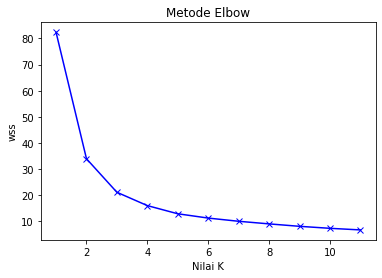

In [ ]:
# Run Cluster Analysis 12 times
# We run the Cluster Analysis using Cluster as 1 till 12. Also, we store the WSS Scores. The WSS score will be used to create the Elbow Plot
# WSS = Within-Cluster-Sum of Squared
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(data_sp2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

plt.plot(K, wss, 'bx-')
plt.title('Metode Elbow')
plt.xlabel('Nilai K')
plt.ylabel('wss')
plt.savefig('Elbow K means')
plt.show()

In [ ]:
# WSS berarti jumlah jarak antara titik dan centroid yang sesuai untuk setiap cluster dan 
# BSS berarti jumlah jarak antara centroid dan mean sampel total dikalikan dengan jumlah titik dalam setiap cluster.

# Hitung Within-Cluster-Sum of Squared Errors (WSS) untuk nilai k yang berbeda , dan pilih k yang mana WSS menjadi yang pertama mulai berkurang.
# Dalam plot WSS-versus-k, ini terlihat sebagai siku.

In [ ]:
#We Store the Number of clusters along with their WSS Scores in a DataFrame
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,82.359512
1,2,33.980983
2,3,21.158675
3,4,16.063827
4,5,12.939317
5,6,11.295259
6,7,10.070966
7,8,9.073594
8,9,8.143976
9,10,7.379712


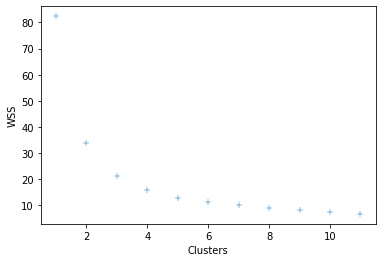

In [ ]:
# elbow plot
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

# Silhouette Method to Indentify Clusters

In [ ]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(data_sp2).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data_sp2,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.4090012933151503
Silhouette score for k(clusters) = 4 is 0.3597187791095093
Silhouette score for k(clusters) = 5 is 0.33779286941188
Silhouette score for k(clusters) = 6 is 0.30698154598065447
Silhouette score for k(clusters) = 7 is 0.30536150748268065
Silhouette score for k(clusters) = 8 is 0.29330341775579666
Silhouette score for k(clusters) = 9 is 0.2976888743143549
Silhouette score for k(clusters) = 10 is 0.30200560303200863
Silhouette score for k(clusters) = 11 is 0.29586958936734425
Silhouette score for k(clusters) = 12 is 0.2888131870817868


In [ ]:
#Max Silhouette Score as k = 3, Hence 3 Clusters is the right option
# kmeans = cluster.KMeans(n_clusters=3 ,init="k-means++")
# kmeans = kmeans.fit(data_sp2[['math score','reading score', 'writing score']])

In [ ]:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(data_sp2)

KMeans(n_clusters=3)

In [ ]:
data_sp['Cluster'] = kmeans2.labels_
data_sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,2
4,male,group C,some college,standard,none,76,78,75,0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0
996,male,group C,high school,free/reduced,none,62,55,55,2
997,female,group C,high school,free/reduced,completed,59,71,65,1
998,female,group D,some college,standard,completed,68,78,77,1


In [ ]:
# data_sp['Clusters'] = kmeans.labels_

In [ ]:
data_sp['Cluster'].value_counts()

1    429
0    310
2    261
Name: Cluster, dtype: int64

In [ ]:
#Data Hasil Cluster 2
cluster_2 = data_sp.loc[data_sp["Cluster"] == 2]
cluster_2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster
3,male,group A,associate's degree,free/reduced,none,47,57,44,2
7,male,group B,some college,free/reduced,none,40,43,39,2
9,female,group B,high school,free/reduced,none,38,60,50,2
10,male,group C,associate's degree,standard,none,58,54,52,2
11,male,group D,associate's degree,standard,none,40,52,43,2
...,...,...,...,...,...,...,...,...,...
980,female,group B,high school,free/reduced,none,8,24,23,2
985,male,group A,high school,standard,none,57,51,54,2
986,female,group C,associate's degree,standard,none,40,59,51,2
988,female,group A,some high school,free/reduced,none,44,45,45,2


In [ ]:
cluster_2['gender'].value_counts()

male      157
female    104
Name: gender, dtype: int64

In [ ]:
data_sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,2
4,male,group C,some college,standard,none,76,78,75,0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0
996,male,group C,high school,free/reduced,none,62,55,55,2
997,female,group C,high school,free/reduced,completed,59,71,65,1
998,female,group D,some college,standard,completed,68,78,77,1


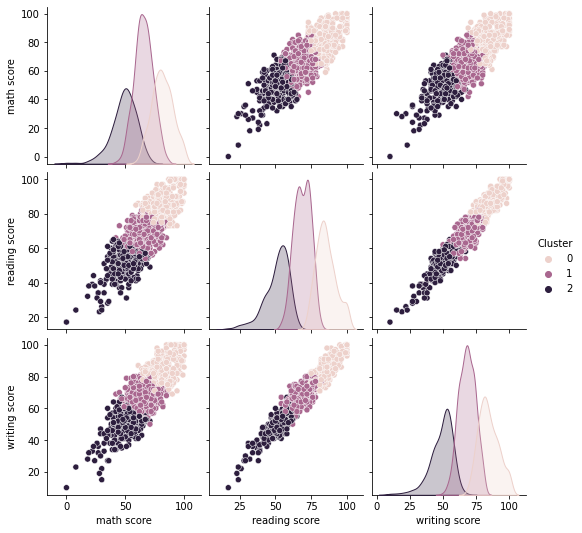

In [ ]:
import seaborn as sns
sns.pairplot(data_sp, hue="Cluster")